In [1]:
# Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint

In [2]:
def ode_model(z, t, R, M, A, D, Beta, y):
    # N: population
    # R: recruitment rate
    # M: death rate
    # A: association rate
    # D: dissociation rate
    # Beta: transmission rate
    # y = recovery rate
    Ns, Ni, Nr, Nss, Nsi, Nsr, Nii, Nir, Nrr = z
    dNsdt = R - 2 * A * Ns ** 2 - A * Ns * Ni + 2 * D * Nss + (M + D) * Nsi + D * Nsr
    dNidt = - (M + y) * Ni - 2 * A * Ni ** 2 - A * Ns * Ni - A * Ni * Nr + D * Nir + 2 * (M + D) * Nii + D * Nsi
    dNrdt = - 2 * A * Nr ** 2 - A * Ni * Nr - A * Ns * Nr + y * Ni + D * Nsr + (M + D) * Nir + 2 * D * Nrr
    dNssdt = - D * Nss + A * Ns ** 2
    dNsidt = - (M + D + Beta + y) * Nsi + A * Ns * Ni
    dNsrdt = - D * Nsr + A * Ns * Nr + y * Nsi
    dNiidt = - (2 * M + D + 2 * y) * Nii + Beta * Nsi + A * Ni ** 2
    dNirdt = - (M + D + y) * Nir + A * Ni * Nr + 2 * y * Nii
    dNrrdt = - D * Nrr + A * Nr ** 2 + y * Nir
    
    return [dNsdt, dNidt, dNrdt, dNssdt, dNsidt, dNsrdt, dNiidt, dNirdt, dNrrdt]

In [3]:
def ode_solver(t, initial_conditions, params):
    initNs, initNi, initNr, initNss, initNsi, initNsr, initNii, initNir, initNrr = initial_conditions
    R, M, A, D, Beta, y = params
    res = odeint(ode_model, [initNs, initNi, initNr, initNss, initNsi, initNsr, initNii, initNir, initNrr], t, args = (R, M, A, D, Beta, y))
    return res

In [4]:
def main(initNs = 100, initNi = 10, initNr = 0, initNss = 0, initNsi = 0, initNsr = 0, initNir = 0, initNrr = 0, initNii = 0, R = 2, M = 0.01, A = 1, D = 1, Beta = 0.5, y = 0.05, time = 1097):
    initial_conditions = [initNs, initNi, initNr, initNss, initNsi, initNsr, initNir, initNrr, initNii]
    params = [R, M, A, D, Beta, y]
    
#     tspan = np.arange(0.36, time, 1)
    tspan = np.arange(0, time, 1)
    sol = ode_solver(tspan, initial_conditions, params)
    Ns, Ni, Nr, Nss, Nsi, Nsr, Nii, Nir, Nrr = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3], sol[:, 4], sol[:, 5], sol[:, 6], sol[:, 7], sol[:, 8]
#     plt.plot(np.log(tspan), Ns + Nsi + Nsr + 2 * Nss, 'b', label = 'Susceptible')
#     plt.plot(np.log(tspan), Ni + Nsi + Nir + 2 * Nii, 'r', label = 'Infected')
#     plt.plot(np.log(tspan), Nr + Nsr + Nir + 2 * Nrr, 'g', label = 'Recovered')
    plt.plot(tspan, Ns + Nsi + Nsr + 2 * Nss, 'b', label = 'Susceptible')
    plt.plot(tspan, Ni + Nsi + Nir + 2 * Nii, 'r', label = 'Infected')
    plt.plot(tspan, Nr + Nsr + Nir + 2 * Nrr, 'g', label = 'Recovered')
    plt.legend(loc='best')
#     plt.xlabel('ln(t)')
    plt.grid()
    plt.show()

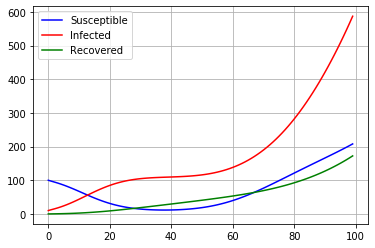

In [5]:
main(R = 0, M = 0.01, y = 0.01, time = 100)